In [55]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [56]:
plt.style.use('ggplot')

In [57]:
start = dt.datetime(2015, 10, 25)
end = dt.datetime(2018,10, 25)

In [58]:
prices = web.DataReader('AAPL','iex',start,end)['close']
prices

date
2015-10-26    109.2583
2015-10-27    108.5664
2015-10-28    113.0398
2015-10-29    114.2340
2015-10-30    113.2578
2015-11-02    114.8501
2015-11-03    116.1675
2015-11-04    115.6272
2015-11-05    115.0942
2015-11-06    115.2274
2015-11-09    114.7610
2015-11-10    111.1441
2015-11-11    110.5159
2015-11-12    110.1447
2015-11-13    106.9276
2015-11-16    108.6742
2015-11-17    108.2125
2015-11-18    111.6391
2015-11-19    113.0573
2015-11-20    113.5522
2015-11-23    112.0769
2015-11-24    113.1525
2015-11-25    112.3434
2015-11-27    112.1340
2015-11-30    112.6004
2015-12-01    111.6867
2015-12-02    110.6777
2015-12-03    109.6498
2015-12-04    113.2952
2015-12-07    112.5814
                ...   
2018-09-14    223.8400
2018-09-17    217.8800
2018-09-18    218.2400
2018-09-19    218.3700
2018-09-20    220.0300
2018-09-21    217.6600
2018-09-24    220.7900
2018-09-25    222.1900
2018-09-26    220.4200
2018-09-27    224.9500
2018-09-28    225.7400
2018-10-01    227.2600
2018-1

In [59]:
returns = prices.pct_change()
last_price = prices[-1]

In [66]:
num_simulation = 1000
num_days = 252

In [67]:
simulation_df = pd.DataFrame()

In [68]:
for x in range(num_simulation):
    count = 0
    daily_vol = returns.std()

    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range (num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count +=1
        
    simulation_df[x] = price_series

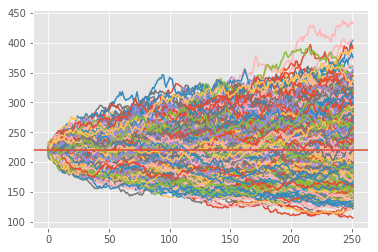

In [69]:
fig = plt.figure()
plt.plot(simulation_df)
plt.axhline(y = last_price)
plt.show()